# Exercise 6

## SVM & Regularization


For this homework we consider a set of observations on a number of red and white wine varieties involving their chemical properties and ranking by tasters. Wine industry shows a recent growth spurt as social drinking is on the rise. The price of wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Pricing of wine depends on such a volatile factor to some extent. Another key factor in wine certification and quality assessment is physicochemical tests which are laboratory-based and takes into account factors like acidity, pH level, presence of sugar and other chemical properties. For the wine market, it would be of interest if human quality of tasting can be related to the chemical properties of wine so that certification and quality assessment and assurance process is more controlled.

Two datasets are available of which one dataset is on red wine and have 1599 different varieties and the other is on white wine and have 4898 varieties. All wines are produced in a particular area of Portugal. Data are collected on 12 different properties of the wines one of which is Quality, based on sensory data, and the rest are on chemical properties of the wines including density, acidity, alcohol content etc. All chemical properties of wines are continuous variables. Quality is an ordinal variable with possible ranking from 1 (worst) to 10 (best). Each variety of wine is tasted by three independent tasters and the final rank assigned is the median rank given by the tasters.

A predictive model developed on this data is expected to provide guidance to vineyards regarding quality and price expected on their produce without heavy reliance on volatility of wine tasters.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
style.use("ggplot")
%matplotlib inline
from sklearn import svm
from sklearn.model_selection import train_test_split,GridSearchCV,ShuffleSplit
#from sklearn import preprocessing
from sklearn.metrics import accuracy_score,roc_curve

In [2]:
data_r = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_red.csv')
data_w = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Wine_data_white.csv')

In [3]:
data = data_w.assign(type = 'white')

data = data.append(data_r.assign(type = 'red'), ignore_index=True)
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3997,6.0,0.26,0.29,3.1,0.041,37.0,144.0,0.98944,3.22,0.39,12.8,7,white
2728,6.5,0.35,0.28,12.4,0.051,86.0,213.0,0.99620,3.16,0.51,9.9,6,white
4428,6.9,0.44,0.27,5.0,0.038,33.0,166.0,0.99124,3.20,0.42,12.2,6,white
2101,6.8,0.28,0.35,2.3,0.042,16.0,85.0,0.99060,3.19,0.56,12.4,6,white
3948,5.7,0.14,0.30,5.4,0.045,26.0,105.0,0.99469,3.32,0.45,9.3,5,white


# Exercise 6.1

Show the frecuency table of the quality by type of wine

In [4]:
table = data[['quality','type']].groupby(['quality','type'])
print(table.size())

quality  type 
3        red        10
         white      20
4        red        53
         white     163
5        red       681
         white    1457
6        red       638
         white    2198
7        red       199
         white     880
8        red        18
         white     175
9        white       5
dtype: int64


#### Se tiene un total de 6497 observaciones, para dos tipos de vinos (Red, White), clasificados en 7 categorias.

# SVM

# Exercise 6.2

* Standarized the features (not the quality)
* Create a binary target for each type of wine
* Create two Linear SVM's for the white and red wines, repectively.


In [5]:
column_names = data.columns.values.tolist()
column_names.remove('type')
column_names.remove('quality')

data_features_r = data[data['type']=='red'][column_names].copy()
data_features_w = data[data['type']=='white'][column_names].copy()

data_target_r =  data[data['type']=='red']['quality'].copy()
data_target_w =  data[data['type']=='white']['quality'].copy()


for col in column_names:
    data_features_r[col] = (data_features_r[col] - data_features_r[col].mean()) / (data_features_r[col].std())
    

for col in column_names:
    data_features_w[col] = (data_features_w[col] - data_features_w[col].mean()) / (data_features_w[col].std())

X_train_r, X_test_r, Y_train_r, Y_test_r = train_test_split(data_features_r, data_target_r, test_size=0.3)
X_train_w, X_test_w, Y_train_w, Y_test_w = train_test_split(data_features_w, data_target_w, test_size=0.3)

classifier_r = svm.SVC(gamma='auto')
classifier_w = svm.SVC(gamma='auto')
classifier_r.fit(X_train_r,Y_train_r)
classifier_w.fit(X_train_w,Y_train_w)

pred_r = classifier_r.predict(X_test_r)
pred_w = classifier_w.predict(X_test_w)

print('Accuracy Red:',round(accuracy_score(Y_test_r, pred_r, normalize=True),3), 
      ' Accuraccy White:',round(accuracy_score(Y_test_w, pred_w, normalize=True),3))


Accuracy Red: 0.606  Accuraccy White: 0.58


#### Se nota que no es un buen modelo, pues el accuracy (exactitud)en la prediccion es  baja.

# Exercise 6.3

Test the two SVM's using the different kernels (‘poly’, ‘rbf’, ‘sigmoid’)


In [6]:
classifier_r = svm.SVC(kernel="poly",gamma='auto')
classifier_w = svm.SVC(kernel="poly",gamma='auto')
classifier_r.fit(X_train_r,Y_train_r)
classifier_w.fit(X_train_w,Y_train_w)

print('poly:\t\t Accuracy Red:',accuracy_score(Y_test_r, classifier_r.predict(X_test_r), normalize=True), 
      ' Accuracy White:',accuracy_score(Y_test_w,  classifier_w.predict(X_test_w), normalize=True))

classifier_r = svm.SVC(kernel="rbf",gamma='auto')
classifier_w = svm.SVC(kernel="rbf",gamma='auto')
classifier_r.fit(X_train_r,Y_train_r)
classifier_w.fit(X_train_w,Y_train_w)

print('rbf:\t\t Accuracy Red:',accuracy_score(Y_test_r, classifier_r.predict(X_test_r), normalize=True), 
      ' Accuracy White:',accuracy_score(Y_test_w,  classifier_w.predict(X_test_w), normalize=True))

classifier_r = svm.SVC(kernel="sigmoid",gamma='auto')
classifier_w = svm.SVC(kernel="sigmoid",gamma='auto')
classifier_r.fit(X_train_r,Y_train_r)
classifier_w.fit(X_train_w,Y_train_w)

print('sigmoid:\t Accuracy Red:',accuracy_score(Y_test_r, classifier_r.predict(X_test_r), normalize=True), 
      ' Accuracy White:',accuracy_score(Y_test_w,  classifier_w.predict(X_test_w), normalize=True))

poly:		 Accuracy Red: 0.5854166666666667  Accuracy White: 0.535374149659864
rbf:		 Accuracy Red: 0.60625  Accuracy White: 0.5795918367346938
sigmoid:	 Accuracy Red: 0.5708333333333333  Accuracy White: 0.43673469387755104


#### El kernel con el que nos da el mejor Accuracy con este modelo de datos, es rbf tanto para los vinos blancos como para los rojos.

# Exercise 6.4
Using the best SVM find the parameters that gives the best performance

'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001]

In [7]:
parameters = [
    {
        'kernel': ['rbf','poly','sigmoid'],
        'gamma': [0.01, 0.001, 0.0001],
        'C': [0.1, 1, 10, 100, 1000]
    }
]

clf_r = GridSearchCV(svm.SVC(decision_function_shape='ovr'), param_grid=parameters,cv = ShuffleSplit())
clf_r.fit(X_train_r,Y_train_r)
print('Best parameters red wines:\t',clf_r.best_params_)

clf_w = GridSearchCV(svm.SVC(decision_function_shape='ovr'), param_grid=parameters,cv = ShuffleSplit())
clf_w.fit(X_train_w,Y_train_w)
print('Best parameters white wines:\t',clf_w.best_params_)

Best parameters red wines:	 {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
Best parameters white wines:	 {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


#### Se genera nuevamente el modelo, con los mejores parametros identificados con la funcion GridSearchCV

In [8]:
classifier_r = svm.SVC(kernel="rbf",gamma=0.01,C=1000).fit(X_train_r,Y_train_r)
classifier_w = svm.SVC(kernel="rbf",gamma=0.01,C=1000).fit(X_train_w,Y_train_w)

print('Accuracy Red:',accuracy_score(Y_test_r, classifier_r.predict(X_test_r), normalize=True), 
      ' Accuracy White:',accuracy_score(Y_test_w,  classifier_w.predict(X_test_w), normalize=True))

Accuracy Red: 0.5854166666666667  Accuracy White: 0.572108843537415


# Exercise 6.5

Compare the results with other methods


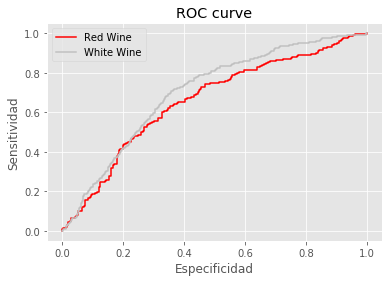

In [10]:
classifier_r = svm.SVC(kernel="rbf", C=1000,gamma=0.01,probability=True)
classifier_w = svm.SVC(kernel="rbf", C=1000,gamma=0.01,probability=True)
probsR = classifier_r.fit(X_train_r,Y_train_r).predict_proba(X_test_r)
probsW = classifier_w.fit(X_train_w,Y_train_w).predict_proba(X_test_w)

fprR, tprR, _ = roc_curve(Y_test_r, probsR[:, 1],pos_label=5)
fprW, tprW, _ = roc_curve(Y_test_w, probsW[:, 1],pos_label=5)

plt.plot(fprR,tprR,color='#FF0000')
plt.plot(fprW,tprW,color='#C0C0C0')

plt.xlabel('Especificidad')
plt.ylabel('Sensitividad')
plt.title('ROC curve')
plt.legend(['Red Wine','White Wine'],loc='best')
plt.show()


#### Otra forma de calificar el modelo, es la curva de ROC, consistente en graficar  la sensibilidad frente a la especificidad.

# Regularization

# Exercise 6.6


* Train a linear regression to predict wine quality (Continous)

* Analyze the coefficients

* Evaluate the RMSE

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error,r2_score
from sklearn.linear_model import LinearRegression
lmR = LinearRegression().fit(y=Y_train_r,X=X_train_r)
predR = lmR.predict(X_test_r)

print('RMSE(Red):\t',np.sqrt(mean_squared_error(Y_test_r,predR)))
print('R^2:\t\t',r2_score(Y_test_r, predR))

lmW = LinearRegression().fit(y=Y_train_w,X=X_train_w)
predW = lmW.predict(X_test_w)

print('\nRMSE(White):\t',np.sqrt(mean_squared_error(Y_test_w,predW)))
print('R^2:\t\t',r2_score(Y_test_w, predW))

RMSE(Red):	 0.6484023298273927
R^2:		 0.3559266606996452

RMSE(White):	 0.769131828625235
R^2:		 0.2456072891766642


# Exercise 6.7

* Estimate a ridge regression with alpha equals 0.1 and 1.
* Compare the coefficients with the linear regression
* Evaluate the RMSE

In [12]:
from sklearn.linear_model import Ridge

lmodel_ridgeR = Ridge(alpha=0.01).fit(y=Y_train_r,X=X_train_r)
predR = lmodel_ridgeR.predict(X_test_r)
print('Regresion Ridge con alpha=0.1')
print('RMSE(Red):\t',np.sqrt(mean_squared_error(Y_test_r,predR)))
print('R^2 (Red):\t',r2_score(Y_test_r, predR))

lmodel_ridgeW = Ridge(alpha=0.01).fit(y=Y_train_w,X=X_train_w)
predR = lmodel_ridgeW.predict(X_test_w)
print('RMSE(White):\t',np.sqrt(mean_squared_error(Y_test_w,predW)))
print('R^2 (White):\t',r2_score(Y_test_w, predW))
#------------------------------------------------------------------------------
lmodel_ridgeR = Ridge(alpha=1).fit(y=Y_train_r,X=X_train_r)
predR = lmodel_ridgeR.predict(X_test_r)
print('\nRegresion Ridge con alpha=1')
print('RMSE(Red):\t',np.sqrt(mean_squared_error(Y_test_r,predR)))
print('R^2 (Red):\t',r2_score(Y_test_r, predR))

lmodel_ridgeW = Ridge(alpha=1).fit(y=Y_train_w,X=X_train_w)
predW = lmodel_ridgeW.predict(X_test_w)
print('RMSE(White):\t',np.sqrt(mean_squared_error(Y_test_w,predW)))
print('R^2 (White):\t',r2_score(Y_test_w, predW))

Regresion Ridge con alpha=0.1
RMSE(Red):	 0.6484015588806414
R^2 (Red):	 0.3559281922979458
RMSE(White):	 0.769131828625235
R^2 (White):	 0.2456072891766642

Regresion Ridge con alpha=1
RMSE(Red):	 0.6483267395399567
R^2 (Red):	 0.35607682317974876
RMSE(White):	 0.7691682309487224
R^2 (White):	 0.24553587801841648


# Exercise 6.8

* Estimate a lasso regression with alpha equals 0.01, 0.1 and 1.
* Compare the coefficients with the linear regression
* Evaluate the RMSE

In [13]:
from sklearn.linear_model import Lasso
#---------------------------------------------------------------------------
lmodel_lassoR = Lasso(alpha=0.01).fit(y=Y_train_r,X=X_train_r)
predR = lmodel_lassoR.predict(X_test_r)
print('Regresion Lasso alpha=0.01')
print('RMSE(Red):\t',np.sqrt(mean_squared_error(Y_test_r,predR)))
print('R^2 (Red):\t',r2_score(Y_test_r,predR))

lmodel_lassoW = Lasso(alpha=0.01).fit(y=Y_train_w,X=X_train_w)
predW = lmodel_lassoW.predict(X_test_w)
print('RMSE(White):\t',np.sqrt(mean_squared_error(Y_test_w,predW)))
print('R^2 (White):\t',r2_score(Y_test_w,predW))
#------------------------------------------------------------------------------
lmodel_lassoR = Lasso(alpha=0.1).fit(y=Y_train_r,X=X_train_r)
predR = lmodel_lassoR.predict(X_test_r)
print('\nRegresion Lasso alpha=0.1')
print('RMSE(Red):\t',np.sqrt(mean_squared_error(Y_test_r,predR)))
print('R^2 (Red):\t',r2_score(Y_test_r,predR))

lmodel_lassoW = Lasso(alpha=0.1).fit(y=Y_train_w,X=X_train_w)
predW = lmodel_lassoW.predict(X_test_w)
print('RMSE(White):\t',np.sqrt(mean_squared_error(Y_test_w,predW)))
print('R^2 (White):\t',r2_score(Y_test_w,predW))

#------------------------------------------------------------------------------
lmodel_lassoR = Lasso(alpha=1).fit(y=Y_train_r,X=X_train_r)
predR = lmodel_lassoR.predict(X_test_r)
print('\nRegresion Lasso alpha=1')
print('RMSE(Red):\t',np.sqrt(mean_squared_error(Y_test_r,predR)))
print('R^2 (Red):\t',r2_score(Y_test_r, predR))

lmodel_lassoW = Lasso(alpha=1).fit(y=Y_train_w,X=X_train_w)
predW = lmodel_lassoW.predict(X_test_w)
print('RMSE(White):\t',np.sqrt(mean_squared_error(Y_test_w,predW)))
print('R^2 (White):\t',r2_score(Y_test_w, predW))

Regresion Lasso alpha=0.01
RMSE(Red):	 0.6478802569244672
R^2 (Red):	 0.35696341782492114
RMSE(White):	 0.7735880562333644
R^2 (White):	 0.23684030227047304

Regresion Lasso alpha=0.1
RMSE(Red):	 0.6693923019128994
R^2 (Red):	 0.3135520438748258
RMSE(White):	 0.8002918806123217
R^2 (White):	 0.18324324100031864

Regresion Lasso alpha=1
RMSE(Red):	 0.8088213109338611
R^2 (Red):	 -0.00219298890918207
RMSE(White):	 0.8860575294227161
R^2 (White):	 -0.0011974998455268615


#### El mejor R^2, corresponde al modelo Lasso con Alpha 0.01

# Exercise 6.9

* Create a binary target

* Train a logistic regression to predict wine quality (binary)

* Analyze the coefficients

* Evaluate the f1score

Accuracy White: 0.7319727891156462
Accuracy Red: 0.7520833333333333


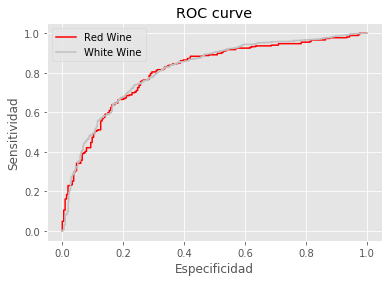

In [14]:
Y_testB_r,Y_trainB_r = np.where( pd.DataFrame(Y_test_r)['quality'] < 6 , 0 , 1 ), np.where( pd.DataFrame(Y_train_r)['quality'] < 6 , 0 , 1 )
Y_testB_w,Y_trainB_w = np.where( pd.DataFrame(Y_test_w)['quality'] < 6 , 0 , 1 ), np.where( pd.DataFrame(Y_train_w)['quality'] < 6 , 0 , 1 )

from sklearn.linear_model import LogisticRegression

lmodel_logisticW = LogisticRegression(random_state=0, solver='lbfgs').fit(y=Y_trainB_w,X=X_train_w)
predW = lmodel_logisticW.predict(X_test_w)
print('Accuracy White:',accuracy_score(Y_testB_w,  predW))

lmodel_ligisticR = LogisticRegression(random_state=0, solver='lbfgs').fit(y=Y_trainB_r,X=X_train_r)
predR = lmodel_ligisticR.predict(X_test_r)
print('Accuracy Red:',accuracy_score(Y_testB_r,  predR))


probsR = classifier_r.fit(X_train_r,Y_trainB_r).predict_proba(X_test_r)
probsW = classifier_w.fit(X_train_w,Y_trainB_w).predict_proba(X_test_w)


fprR, tprR, _ = roc_curve(Y_testB_r, probsR[:, 1],pos_label=1)
fprW, tprW, _ = roc_curve(Y_testB_w, probsW[:, 1],pos_label=1)

plt.plot(fprR,tprR,color='#FF0000')
plt.plot(fprW,tprW,color='#C0C0C0')

plt.xlabel('Especificidad')
plt.ylabel('Sensitividad')
plt.title('ROC curve')
plt.legend(['Red Wine','White Wine'],loc='best')
plt.show()


#### El accuracy eneste modelo, mejora respecto a los anteriores, lo que tambié se evidencia en la  curva de ROC

# Exercise 6.10

* Estimate a regularized logistic regression using:
* C = 0.01, 0.1 & 1.0
* penalty = ['l1, 'l2']
* Compare the coefficients and the f1score

In [15]:
valsC =[0.01,0.1,1.0]
valsPenalty=['l1','l2']

bestR=0
text=''

for valC in valsC:
    for valPenalty in valsPenalty:
        lmodel_logisticR = LogisticRegression(solver='liblinear',random_state=0, C=valC,penalty=valPenalty).fit(y=Y_trainB_r,X=X_train_r)
        predR = lmodel_logisticR.predict(X_test_r)
        print('Accuracy Red: C=',valC,' Penalty=',valPenalty,accuracy_score(Y_testB_r,  predR))
        if bestR < accuracy_score(Y_testB_r,  predR):
            bestR = accuracy_score(Y_testB_r,  predR)
            text = 'The best Accuracy for Red Wines is ' + '\033[1m' +str(bestR) + '\033[0m' + ' With C=' + str(valC) + ' and penalty=' + valPenalty
        
print(text,'\n')


bestW=0
text=''
for valC in valsC:
    for valPenalty in valsPenalty:
        lmodel_logisticW = LogisticRegression(solver='liblinear',random_state=0, C=valC,penalty=valPenalty).fit(y=Y_trainB_w,X=X_train_w)
        predW = lmodel_logisticW.predict(X_test_w)
        print('Accuracy White: C=',valC,' Penalty=',valPenalty,accuracy_score(Y_testB_w,  predW))
        if bestW < accuracy_score(Y_testB_w,  predW):
            bestW = accuracy_score(Y_testB_w,  predW)
            text = 'The best Accuracy for White wines is ' + '\033[1m' +str(bestW) + '\033[0m' + ' With C=' + str(valC) + ' and penalty=' + valPenalty
print(text)


Accuracy Red: C= 0.01  Penalty= l1 0.7104166666666667
Accuracy Red: C= 0.01  Penalty= l2 0.7375
Accuracy Red: C= 0.1  Penalty= l1 0.7375
Accuracy Red: C= 0.1  Penalty= l2 0.7375
Accuracy Red: C= 1.0  Penalty= l1 0.7541666666666667
Accuracy Red: C= 1.0  Penalty= l2 0.7520833333333333
The best Accuracy for Red Wines is 0.7541666666666667 With C=1.0 and penalty=l1 

Accuracy White: C= 0.01  Penalty= l1 0.7163265306122449
Accuracy White: C= 0.01  Penalty= l2 0.726530612244898
Accuracy White: C= 0.1  Penalty= l1 0.7306122448979592
Accuracy White: C= 0.1  Penalty= l2 0.726530612244898
Accuracy White: C= 1.0  Penalty= l1 0.7326530612244898
Accuracy White: C= 1.0  Penalty= l2 0.7319727891156462
The best Accuracy for White wines is 0.7326530612244898 With C=1.0 and penalty=l1
